<a href="https://colab.research.google.com/github/MathiLogha/NLPwordnet/blob/main/wordNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from nltk.corpus import wordnet
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#Generate definitions
synsets = wordnet.synsets('sport')
for synset in synsets:
    print("\n * "+ synset.definition())
synonyms = []
for lemma in synsets[0].lemmas():
    synonyms.append(lemma.name())


 * an active diversion requiring physical exertion and competition

 * the occupation of athletes who compete for pay

 * (Maine colloquial) a temporary summer resident of Maine

 * a person known for the way she (or he) behaves when teased or defeated or subjected to trying circumstances

 * someone who engages in sports

 * (biology) an organism that has characteristics resulting from chromosomal alteration

 * verbal wit or mockery (often at another's expense but not to be taken seriously)

 * wear or display in an ostentatious or proud manner

 * play boisterously


In [ ]:
synonyms_str = ' '.join(synonyms)

In [ ]:
#wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(synonyms_str)

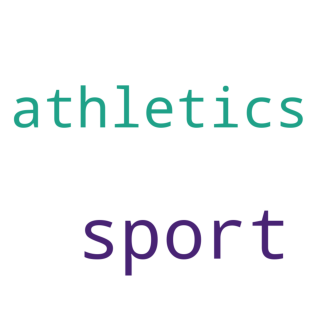

In [ ]:
plt.figure(figsize=(5, 3), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [ ]:
#Part-of-speech tagging
import nltk
nltk.download('averaged_perceptron_tagger')
pos = []
for synset in synsets:
    pos.append(synset.pos())

tagged_pos = nltk.pos_tag(pos)

print(tagged_pos)

[('n', 'JJ'), ('n', 'JJ'), ('n', 'NN'), ('n', 'JJ'), ('n', 'JJ'), ('n', 'NN'), ('n', 'JJ'), ('v', 'NN'), ('v', 'NN')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
#Finding hypernyms and hyponyms
hypernyms = []
hyponyms = []
for synset in synsets:
    hypernyms.extend(synset.hypernyms())
    hyponyms.extend(synset.hyponyms())

print("Hypernyms:")
for hypernym in hypernyms:
    print(hypernym.name())

print("Hyponyms:")
for hyponym in hyponyms:
    print(hyponym.name())

Hypernyms:
diversion.n.01
occupation.n.01
vacationer.n.01
person.n.01
athlete.n.01
organism.n.01
wit.n.01
have.v.02
play.v.05
Hyponyms:
archery.n.01
athletic_game.n.01
blood_sport.n.01
contact_sport.n.01
cycling.n.01
funambulism.n.01
gymnastics.n.01
judo.n.01
outdoor_sport.n.01
racing.n.01
riding.n.01
rock_climbing.n.01
rowing.n.01
skating.n.01
skiing.n.01
sledding.n.01
spectator_sport.n.01
team_sport.n.01
track_and_field.n.01
water_sport.n.01
professional_baseball.n.01
professional_basketball.n.01
professional_boxing.n.01
professional_football.n.01
professional_golf.n.01
professional_tennis.n.01
professional_wrestling.n.01
sumo.n.01
freak.n.01
drollery.n.01
jocosity.n.01
pun.n.01
waggery.n.01


In [ ]:
#Calculating semantic similarity
sport_synsets = wordnet.synsets('sport')
game_synsets = wordnet.synsets('game')
max_similarity = 0
for sport_synset in sport_synsets:
    for game_synset in game_synsets:
        similarity = sport_synset.wup_similarity(game_synset)
        if similarity is not None and similarity > max_similarity:
            max_similarity = similarity

print("Semantic similarity between 'sport' and 'game':", max_similarity)


Semantic similarity between 'sport' and 'game': 0.875


In [ ]:
#Word sense disambiguation
import nltk
nltk.download('punkt')
from nltk.corpus import wordnet

sentence = "I love playing sport in my free time."
target_word = "sport"

synsets = wordnet.synsets(target_word)

best_synset = None
max_overlap = 0
for synset in synsets:
    definition = synset.definition()
    examples = synset.examples()

    definition_tokens = set(nltk.word_tokenize(definition))
    example_tokens = set(token for example in examples for token in nltk.word_tokenize(example))

    overlap = len(definition_tokens.intersection(sentence.split())) + len(example_tokens.intersection(sentence.split()))

    if overlap > max_overlap:
        best_synset = synset
        max_overlap = overlap
print("Disambiguated sense of the word '", target_word, "':", best_synset.definition())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Disambiguated sense of the word ' sport ': verbal wit or mockery (often at another's expense but not to be taken seriously)


In [ ]:
synsets = wordnet.synsets(target_word)
best_synset = None

max_overlap = 0
for synset in synsets:
    definition = synset.definition()
    examples = synset.examples()

    definition_tokens = set(word for word, pos in nltk.pos_tag(nltk.word_tokenize(definition)) if pos.startswith('N') or pos.startswith('V'))
    example_tokens = set(word for example in examples for word, pos in nltk.pos_tag(nltk.word_tokenize(example)) if pos.startswith('N') or pos.startswith('V'))

    sentence_tokens = [word for word, pos in nltk.pos_tag(nltk.word_tokenize(sentence)) if pos.startswith('N') or pos.startswith('V')]
    overlap = len(definition_tokens.intersection(sentence_tokens)) + len(example_tokens.intersection(sentence_tokens))
    if overlap > max_overlap:
        best_synset = synset
        max_overlap = overlap

print("Disambiguated sense of the word '", target_word, "':", best_synset.definition())


Disambiguated sense of the word ' sport ': a person known for the way she (or he) behaves when teased or defeated or subjected to trying circumstances
